In [14]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", 
        "dog", "frog", "horse", "ship", "truck"]

In [20]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [21]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9531 - accuracy: 0.2988 - val_loss: 1.6822 - val_accuracy: 0.4078
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6645 - accuracy: 0.4122 - val_loss: 1.6814 - val_accuracy: 0.3971
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5821 - accuracy: 0.4393 - val_loss: 1.7142 - val_accuracy: 0.3981
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5171 - accuracy: 0.4641 - val_loss: 1.5192 - val_accuracy: 0.4568
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4685 - accuracy: 0.4796 - val_loss: 1.5010 - val_accuracy: 0.4712
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4309 - accuracy: 0.4975 - val_loss: 1.4645 - val_accuracy: 0.4819
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3830 - accuracy: 0.5148 

In [22]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.61      0.70      0.65      1000
  automobile       0.70      0.63      0.66      1000
        bird       0.49      0.40      0.44      1000
         cat       0.36      0.44      0.39      1000
        deer       0.49      0.50      0.50      1000
         dog       0.49      0.44      0.46      1000
        frog       0.60      0.63      0.61      1000
       horse       0.67      0.61      0.64      1000
        ship       0.71      0.64      0.67      1000
       truck       0.59      0.65      0.62      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



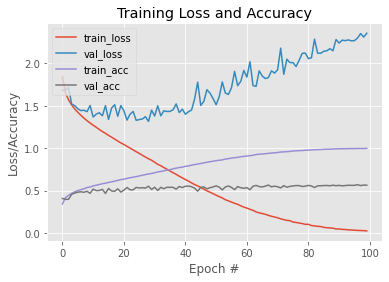

In [23]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()